In [19]:
from os import listdir
from os.path import isfile, join
import re
import csv
import gensim
import numpy as np
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import FastText
import logging
import os
import pandas as pd 
import sys
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import random
import math
import warnings
import utils_zj
from utils_zj import *
from utils2 import *
from utilsTimeSeries_zj import *
import scipy.stats
from dataDictionariesLexicons import *
from testData import *
from polesConstructs import *
from matplotlib.pyplot import *
import statsmodels.api as sm
from scipy import stats
random.seed(1)
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector

statsR = importr('stats') # p-values multiple comparisons adjustment

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore')

sys.path.insert(0, '../') 

import warnings
warnings.filterwarnings("ignore")

from outletsBiasRatings import outletsBiasRatingsAllSides, outletsBiasRatingsMediaBiasFactCheck, outletsBiasRatingsFairReporters, outletsBiasRatingsAdFontesMedia, outletAbbreviationToFullName 

In [20]:
outletsBiasRatingsAllSides ={ ## https://www.allsides.com/media-bias/media-bias-ratings
#Outlets with large availability of news articles since 2000    
'nyt': -1.5,    
#'wp': -1,
#'guardian': -1,
#'thenation': -2,
'slate': -2,
'cbs': -1,    
#'economist': -1, 
#'csm': 0, 
#'reuters': 0,
#'wsj': 0.5,
'nyp': 1.5,
'wt': 1,    
'dailymail': 2,    
 }

In [21]:
outletsBiasRatings = outletsBiasRatingsAllSides
outlets=list(outletsBiasRatings.keys())

print(outlets)

['nyt', 'slate', 'cbs', 'nyp', 'wt', 'dailymail']


In [22]:
leftwingOutlets = [k for k,v in outletsBiasRatings.items() if v < 0]
rightwingOutlets = [k for k,v in outletsBiasRatings.items() if v > 0]
centerwingOutlets = [k for k,v in outletsBiasRatings.items() if v == 0]
centerwingOutlets

[]

In [23]:
startYear=2000#
endYear = 2019
years = list(range(startYear,endYear+1))
intervalLength = 5

intervalsList = []
interval = []

for year in range(startYear,endYear+1):
    if year%intervalLength==0:
        intervalsList.append(interval)
        interval = []
    interval.append(year)
    
intervalsList.append(interval)
    
intervalsList.pop(0)

intervalNames=[]
for interval in intervalsList:
    intervalName = str(interval[0])+'-'+str(interval[-1])
    intervalNames.append(intervalName)
    print(intervalName)
intervalNames = [str(start)+'-'+str(start+intervalLength-1) for start in list(range(startYear,endYear,intervalLength))]
print(intervalNames)
intervalsList

2000-2004
2005-2009
2010-2014
2015-2019
['2000-2004', '2005-2009', '2010-2014', '2015-2019']


[[2000, 2001, 2002, 2003, 2004],
 [2005, 2006, 2007, 2008, 2009],
 [2010, 2011, 2012, 2013, 2014],
 [2015, 2016, 2017, 2018, 2019]]

In [24]:
# load models
models = {}
for interval in intervalsList:
    intervalName = str(interval[0])+'-'+str(interval[-1])
    print(intervalName)
    models[intervalName]={}
    for outlet in outlets:
        modelPath = os.path.normpath(f'../models/{outlet}/') 
        modelFilePath = os.path.join(modelPath, intervalName + '.model')
        try:
            model = KeyedVectors.load(modelFilePath) 
        except:
            continue
        models[intervalName][outlet] = model    

2000-2004
2005-2009
2010-2014
2015-2019


In [25]:
models['2000-2004']

{'nyt': <gensim.models.word2vec.Word2Vec at 0x55ad25950>,
 'slate': <gensim.models.word2vec.Word2Vec at 0x518ef2c50>,
 'cbs': <gensim.models.word2vec.Word2Vec at 0x576f8c5d0>,
 'nyp': <gensim.models.word2vec.Word2Vec at 0x55ad24390>,
 'wt': <gensim.models.word2vec.Word2Vec at 0x5ac244090>,
 'dailymail': <gensim.models.word2vec.Word2Vec at 0x576f04110>}

In [26]:
lexicons = [ideonomyPersonalityTraits526]
dataDict = dataDictLoadLexicons(dataDict,lexicons)

In [27]:
dataSetIndexes = [
'1-1', #Personal ideology
'1-2', #Party affiliation and political parties
'1-3', #US presidents
]

In [28]:
intervalNames = [str(start)+'-'+str(start+intervalLength-1) for start in list(range(startYear,endYear,intervalLength))]

tsMatrixRightWingOutlets, CIMatrixRightWingOutlets = getMultipleTimeSeriesAggregatingAcrossOutlets(models,
                                                    rightwingOutlets,dataSetIndexes,startYear,endYear,intervalLength,dataDict)


tsMatrixLeftWingOutlets, CIMatrixLeftWingOutlets = getMultipleTimeSeriesAggregatingAcrossOutlets(models,
                                                    leftwingOutlets,dataSetIndexes,startYear,endYear,intervalLength,dataDict)

tsMatrixCenterWingOutlets, CIMatrixCenterWingOutlets = getMultipleTimeSeriesAggregatingAcrossOutlets(models,
                                                    centerwingOutlets,dataSetIndexes,startYear,endYear,intervalLength,dataDict)

1-1,Spearman: SignificanceResult(statistic=0.05723043423721491, pvalue=0.21852310992673404)
Pearson: PearsonRResult(statistic=0.06362490431554081, pvalue=0.17124565761846708)
Spearman: SignificanceResult(statistic=0.04067138887983294, pvalue=0.37950461462661933)
Pearson: PearsonRResult(statistic=0.017844769702853498, pvalue=0.6999017886119534)
Spearman: SignificanceResult(statistic=0.04394853061177121, pvalue=0.34072427272091577)
Pearson: PearsonRResult(statistic=0.035329505399065486, pvalue=0.44382078161948735)
Spearman: SignificanceResult(statistic=-0.0505000909307799, pvalue=0.2725268483034895)
Pearson: PearsonRResult(statistic=-0.040556025476317765, pvalue=0.3783187154416332)
Spearman: SignificanceResult(statistic=-0.11637581691108048, pvalue=0.010885763100816011)
Pearson: PearsonRResult(statistic=-0.1204545552347946, pvalue=0.008383210115117624)
Spearman: SignificanceResult(statistic=-0.2037002131664087, pvalue=6.6947131182618196e-06)
Pearson: PearsonRResult(statistic=-0.214933880

In [29]:
print(tsMatrixRightWingOutlets.shape)
print(tsMatrixLeftWingOutlets.shape)
print(tsMatrixCenterWingOutlets.shape)

(3, 4)
(3, 4)
(3, 4)


In [30]:
PvaluesR=[]
PvaluesL=[]
bsR = []
bsL = []
for dataSetIndexIndex,dataSetIndex in enumerate(dataSetIndexes):
    tsLeftWingOutlet = tsMatrixLeftWingOutlets[dataSetIndexIndex]
    CILeftWingOutlet = CIMatrixLeftWingOutlets[dataSetIndexIndex]
    
    tsRightWingOutlet = tsMatrixRightWingOutlets[dataSetIndexIndex]
    CIRightWingOutlet = CIMatrixRightWingOutlets[dataSetIndexIndex]

    bR,pValuelopeR =testPvalue(range(len(tsRightWingOutlet)),tsRightWingOutlet)   
    bL,pValuelopeL =testPvalue(range(len(tsLeftWingOutlet)),tsLeftWingOutlet)
    PvaluesR.append(pValuelopeR)
    PvaluesL.append(pValuelopeL)
    bsR.append(bR)
    bsL.append(bL)
    
#Multiple comparisons P value adjustments
#bonferroni most conservative, holm also valid under arbitrary assumptions
adjustedPvaluesL = statsR.p_adjust(FloatVector(PvaluesL), method = 'bonferroni')
adjustedPvaluesR = statsR.p_adjust(FloatVector(PvaluesR), method = 'bonferroni')        

In [31]:
PvaluesR = []
PvaluesL = []
bsR = []
bsL = []
for dataSetIndexIndex, dataSetIndex in enumerate(dataSetIndexes):
    tsLeftWingOutlet = tsMatrixLeftWingOutlets[dataSetIndexIndex]
    CILeftWingOutlet = CIMatrixLeftWingOutlets[dataSetIndexIndex]

    tsRightWingOutlet = tsMatrixRightWingOutlets[dataSetIndexIndex]
    CIRightWingOutlet = CIMatrixRightWingOutlets[dataSetIndexIndex]

    # 检查 tsRightWingOutlet 和 tsLeftWingOutlet 是否为空或全零
    if np.any(tsRightWingOutlet) and np.any(tsLeftWingOutlet):
        yearsToPlotR = range(len(tsRightWingOutlet))
        yearsToPlotL = range(len(tsLeftWingOutlet))

        # 检查输入参数是否有效
        if len(yearsToPlotR) == len(tsRightWingOutlet) and len(yearsToPlotL) == len(tsLeftWingOutlet):
            bR, pValuelopeR = testPvalue(yearsToPlotR, tsRightWingOutlet)
            bL, pValuelopeL = testPvalue(yearsToPlotL, tsLeftWingOutlet)
            PvaluesR.append(pValuelopeR)
            PvaluesL.append(pValuelopeL)
            bsR.append(bR)
            bsL.append(bL)

# Multiple comparisons P value adjustments
# bonferroni most conservative, holm also valid under arbitrary assumptions
adjustedPvaluesL = statsR.p_adjust(FloatVector(PvaluesL), method='bonferroni')
adjustedPvaluesR = statsR.p_adjust(FloatVector(PvaluesR), method='bonferroni')

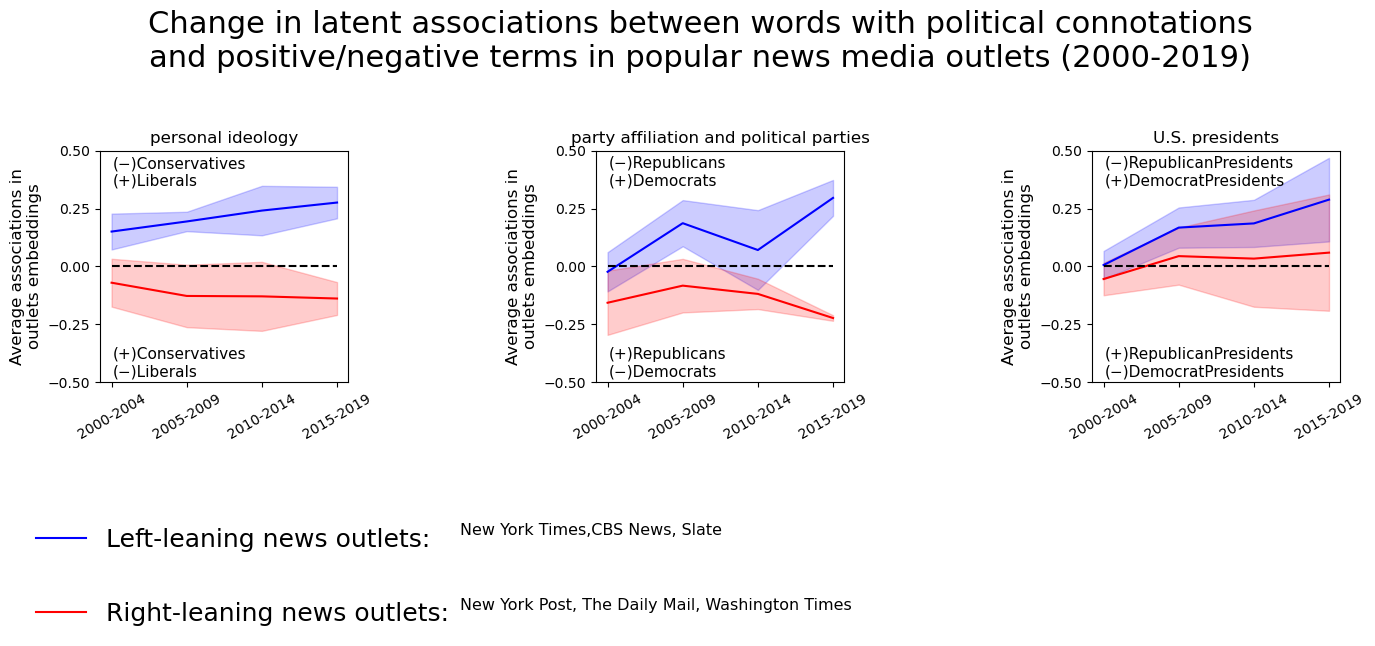

In [39]:
#Plotting time series for Right wing and left wing outlets
nrows=1
ncolumns=3
fig, axes = plt.subplots(nrows, ncolumns,figsize=(16,3))
for dataSetIndexIndex,dataSetIndex in enumerate(dataSetIndexes):
        
    ax=plt.subplot(nrows, ncolumns, dataSetIndexIndex+1)
        
    tsLeftWingOutlet = tsMatrixLeftWingOutlets[dataSetIndexIndex]
    CILeftWingOutlet = CIMatrixLeftWingOutlets[dataSetIndexIndex]
    
    tsRightWingOutlet = tsMatrixRightWingOutlets[dataSetIndexIndex]
    CIRightWingOutlet = CIMatrixRightWingOutlets[dataSetIndexIndex]

    tsCenterWingOutlet = tsMatrixCenterWingOutlets[dataSetIndexIndex]
    CICenterWingOutlet = CIMatrixCenterWingOutlets[dataSetIndexIndex]
    if dataSetIndexIndex==2:
        ax.plot(intervalNames,tsLeftWingOutlet,color='b',label="Left-leaning news outlets:")
    else:
        ax.plot(intervalNames,tsLeftWingOutlet,color='b')
        
    fill_between(intervalNames, tsLeftWingOutlet+CILeftWingOutlet, tsLeftWingOutlet-CILeftWingOutlet,color='b', alpha=.2)

    offset=5
    if dataSetIndexIndex==2:
        ax.plot(intervalNames[-offset:],tsRightWingOutlet[-offset:],color='r',label="Right-leaning news outlets:")
    else:
        ax.plot(intervalNames[-offset:],tsRightWingOutlet[-offset:],color='r')
    fill_between(intervalNames[-offset:], tsRightWingOutlet[-offset:]+CIRightWingOutlet[-offset:], tsRightWingOutlet[-offset:]-CIRightWingOutlet[-offset:],color='r', alpha=.2)

    ax.plot(intervalNames,len(tsLeftWingOutlet)*[0],'k--')
    
    bR,pValueSlopeR = bsR[dataSetIndexIndex], adjustedPvaluesR[dataSetIndexIndex]
    bL,pValueSlopeL = bsL[dataSetIndexIndex], adjustedPvaluesL[dataSetIndexIndex]

    ax = plt.gca()
    ax.set_ylim([-0.4,0.4])
    
    plt.title(dataDict[dataSetIndex]['name'])
    pole1Name = dataDict[dataSetIndex]['axisName'].split()[0]
    pole2Name = dataDict[dataSetIndex]['axisName'].split()[2]

    annotationBiasUp = "("+"\u2212"+")"+pole1Name+'\n'+"(+)"+pole2Name
    annotationBiasDown = "(+)"+pole1Name+"\n("+u"\u2212"+")"+pole2Name#+" bias"
    ax.annotate(annotationBiasUp, xy=(0.05, 0.85), xycoords="axes fraction", fontsize=11)
    ax.annotate(annotationBiasDown, xy=(0.05, 0.025), xycoords="axes fraction", fontsize=11)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([-0.5,-0.25,0,0.25,0.3])
    plt.yticks([-0.5,-0.25,0,0.25,0.5])
    plt.ylabel("Average associations in\noutlets embeddings",size=12)
    plt.xticks(intervalNames,rotation=30,fontsize=10)
    if dataSetIndexIndex==2:
        plt.legend(loc=(-4.3,-1.1),fontsize=18,ncol=1,frameon=False,labelspacing=2)  

leftOutletsNames = "New York Times,CBS News, Slate"
rightOutletsNames = "New York Post, The Daily Mail, Washington Times"        
fig.text(x=0.35,y=-0.4,s=leftOutletsNames,fontsize=11.5)        
fig.text(x=0.35,y=-0.65,s=rightOutletsNames,fontsize=11.5)        

fig.suptitle('Change in latent associations between words with political connotations\nand positive/negative terms in popular news media outlets (2000-2019)',size=22, y=1.35)    


plt.subplots_adjust(hspace = 0.6,wspace = 1.0)


plt.subplots_adjust(hspace = 0.6,wspace = 1.0)

plt.savefig(f'../figures/time_series.png',dpi=300,bbox_inches='tight',pad_inches=0)

In [33]:
# dataSetIndexes = ['1-1','1-2','1-3','1-4','1-5']
d={}
dR={}
dL={}
dC={}
for dataSetIndex in dataSetIndexes:
    print(dataSetIndex,end=',')
    m=np.zeros((len(outlets),len(intervalNames)))
    for outletIndex, outlet in enumerate(outlets):
        for intervalNameIndex, intervalName in enumerate(intervalNames):
            c,p=getBiasForOutlet(models, outlet, intervalName, dataSetIndex, dataDict,pearson=True)
            m[outletIndex,intervalNameIndex]=c
    mR=m[[outlets.index(outlet) for outlet in rightwingOutlets]]
    mL=m[[outlets.index(outlet) for outlet in leftwingOutlets]]    
    mC=m[[outlets.index(outlet) for outlet in centerwingOutlets]]  
    d[dataSetIndex]=m
    dR[dataSetIndex]=mR
    dL[dataSetIndex]=mL
    dC[dataSetIndex]=mC

1-1,Spearman: SignificanceResult(statistic=0.20816338985832103, pvalue=3.365901426336532e-06)
Pearson: PearsonRResult(statistic=0.2080218278221236, pvalue=3.4190035269324724e-06)
Spearman: SignificanceResult(statistic=0.23530375357238106, pvalue=1.3676970793886537e-07)
Pearson: PearsonRResult(statistic=0.2391263515881494, pvalue=8.42928708128045e-08)
Spearman: SignificanceResult(statistic=0.3687986346247726, pvalue=2.8900677235253633e-17)
Pearson: PearsonRResult(statistic=0.371150500115452, pvalue=1.7544015590492828e-17)
Spearman: SignificanceResult(statistic=0.36172808643207643, pvalue=1.264722994147501e-16)
Pearson: PearsonRResult(statistic=0.3784593579280139, pvalue=3.622682818335456e-18)
Spearman: SignificanceResult(statistic=0.05442293411923587, pvalue=0.24250728923257306)
Pearson: PearsonRResult(statistic=0.047869082020003104, pvalue=0.3040322194530009)
Spearman: SignificanceResult(statistic=0.20281039634412448, pvalue=9.3688193765342e-06)
Pearson: PearsonRResult(statistic=0.2044

In [34]:
pvalues=[]
for ideology in ["L","R"]:
    print( ideology )
    for key in ['1-1','1-2','1-3']:
        print( key,end=", " )
        if ideology=="L":
            tsBiasesAllOutlets=dL[key] 
            x=list(range(1,4+1))
        elif ideology=="R":
            tsBiasesAllOutlets=dR[key] 
            x=list(range(1,4+1))
    
        tsBiasesAllAverage=np.nanmean(tsBiasesAllOutlets,axis=0)    
        y=tsBiasesAllAverage
        slope, intercept, r_value, p_value, std_err=stats.linregress(x,y[-len(x):]) #-len(x): To take into account that for right-wing outlets we only have 5 data points
        print("slope: ",slope, "t-statistic", slope/std_err ,"p_value: ", p_value, "r_value: ", r_value,)
        pvalues.append(p_value)

L
1-1, slope:  0.048575685436819185 t-statistic 16.023334589353176 p_value:  0.0038722726016260367 r_value:  0.996127727398374
1-2, slope:  0.08794915780508099 t-statistic 1.8131712342458484 p_value:  0.211485040221163 r_value:  0.7885149597788369
1-3, slope:  0.08267446273515187 t-statistic 5.1115902926668015 p_value:  0.03620677972313402 r_value:  0.963793220276866
R
1-1, slope:  -0.0200928798285253 t-statistic -1.5392346583248138 p_value:  0.2636204528787534 r_value:  -0.7363795471212464
1-2, slope:  -0.017684439077262182 t-statistic -0.6402916408115051 p_value:  0.5875496192989916 r_value:  -0.41245038070100837
1-3, slope:  0.030744946741721586 t-statistic 2.1819748398608683 p_value:  0.16084185477024418 r_value:  0.8391581452297557


In [35]:
stats.combine_pvalues(pvalues[0:3])

SignificanceResult(statistic=20.852047232124768, pvalue=0.0019503366822272426)

In [36]:
stats.combine_pvalues(pvalues[3:])

SignificanceResult(statistic=7.384746264346006, pvalue=0.2867260895977538)